In [156]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [158]:
# Importing data

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [160]:
# Having a copy of data

df_2 = df.copy()

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [164]:
# Dropping irrelevent columns
df.drop(columns='customerID' , axis=1 ,inplace=True)

In [166]:
# Checking the Missing Values
df.isnull().sum()

# There is no missing values in any of the features

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [168]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [170]:
# Total charges Columns was with different data type to change it as numerical col
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'] ,errors='coerce')
df["SeniorCitizen"] = df["SeniorCitizen"].astype("object")

In [172]:
# Dropped the missing rows of TotalCharges as there are only 0.15% values presented 
df = df.dropna(subset=['TotalCharges'] )

NameError: name 'df' is not defined

In [174]:
# Checking for presence of outliers in numerical columns

Num_col = [ 'tenure', 'MonthlyCharges', 'TotalCharges']

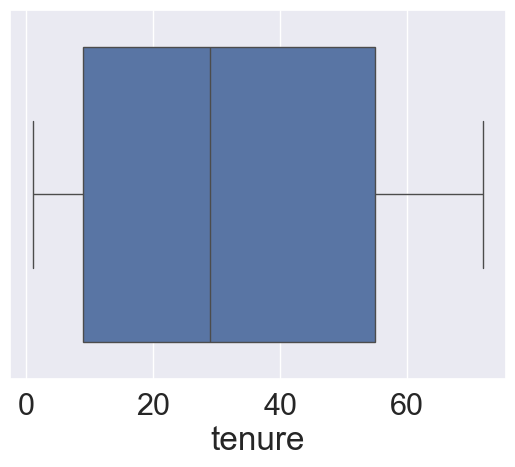

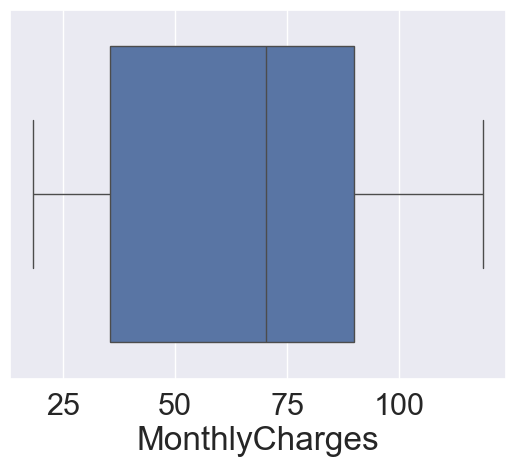

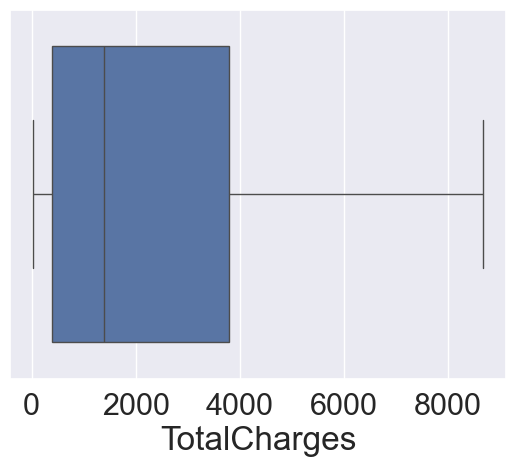

In [176]:
# Delecting the presence of Outliers 
for i in Num_col:
    plt.figure()
    sns.boxplot(x= df[i] , orient='h')
    plt.show()

# There are no outliers Detected in the numereical columns

In [211]:
df[Num_col].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


## Target Variable Distribution

In [185]:
# churn customers proportion

df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

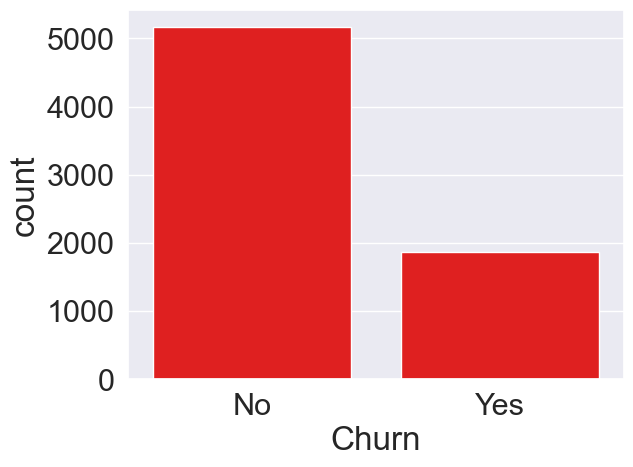

In [180]:
sns.countplot(data = df , x = df['Churn'], color='red')
plt.show()

- 1869 of customers has exited from the telecom service

In [187]:
# churn customers 

df['Churn'].value_counts(normalize=True)*100

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64

- 26.57% of customers has exited from the telecom service

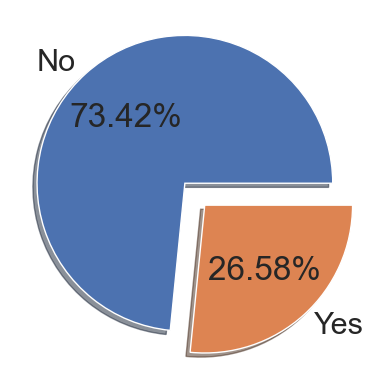

In [190]:
plt.pie(x = df['Churn'].value_counts() , autopct='%0.2f%%' ,shadow=True ,labels=['No','Yes'], explode=[0.1,0.1])
plt.show()

In [192]:
Num_col

['tenure', 'MonthlyCharges', 'TotalCharges']

#  Univariate Anlaysis

### i) Numerical Columns Analysis

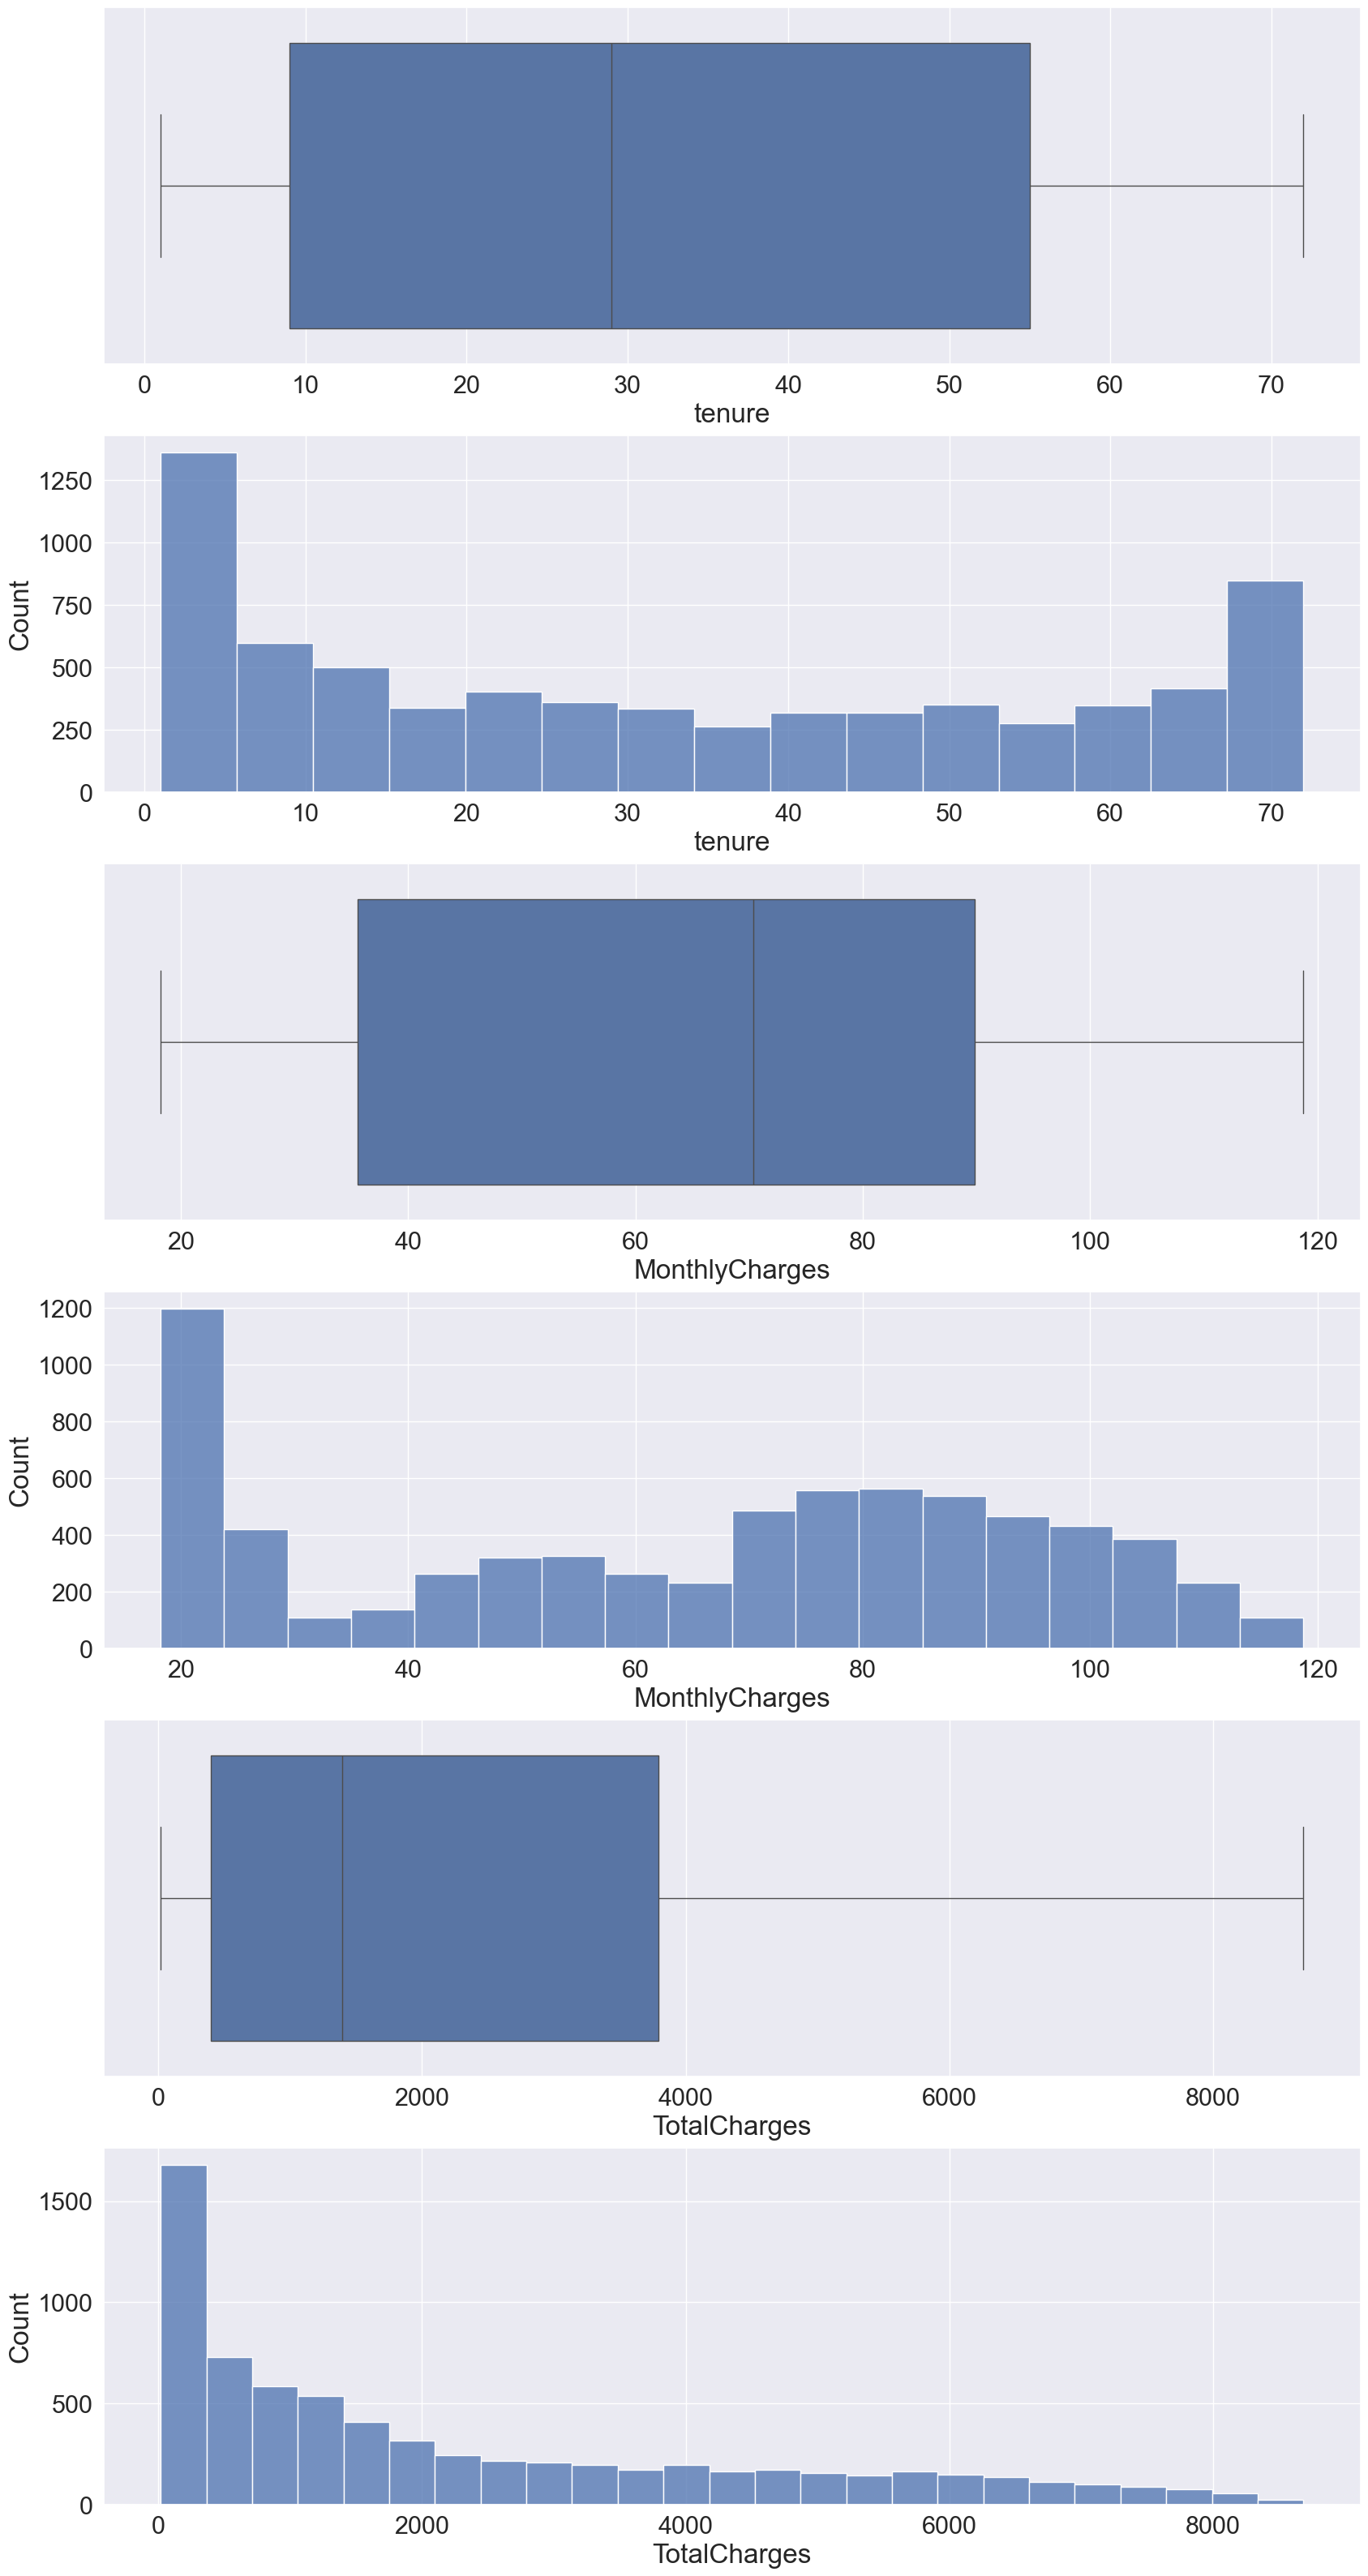

In [233]:
fig , ax = plt.subplots(6 , figsize = (20,40))
sns.set(font_scale = 2)

sns.boxplot(data = df , x = 'tenure' , ax=ax[0])
sns.histplot(data = df , x = 'tenure' , ax=ax[1])

sns.boxplot(data = df , x = 'MonthlyCharges' , ax=ax[2])
sns.histplot(data = df , x = 'MonthlyCharges' , ax=ax[3])

sns.boxplot(data = df , x = 'TotalCharges' , ax=ax[4])
sns.histplot(data = df , x = 'TotalCharges' , ax=ax[5])

plt.show()

# Independent numerical variable says
1.In the tenure column  its significes that most of the customers stayed at below 10 months plan and  a few customers are being with long term plan with above 70 months 


2.As Monthly charges was right skewed It indicates that Monthly charges most of the customers are charges at 20 USD and a very few have charged at higher point above 100 USD

3.Total charges are also right skewed as the a large range of customers make a below 2000 dollars  very less are charged above 2000 dollars.lars.

### ii) Numerical Columns Analysis in relation with Target Column

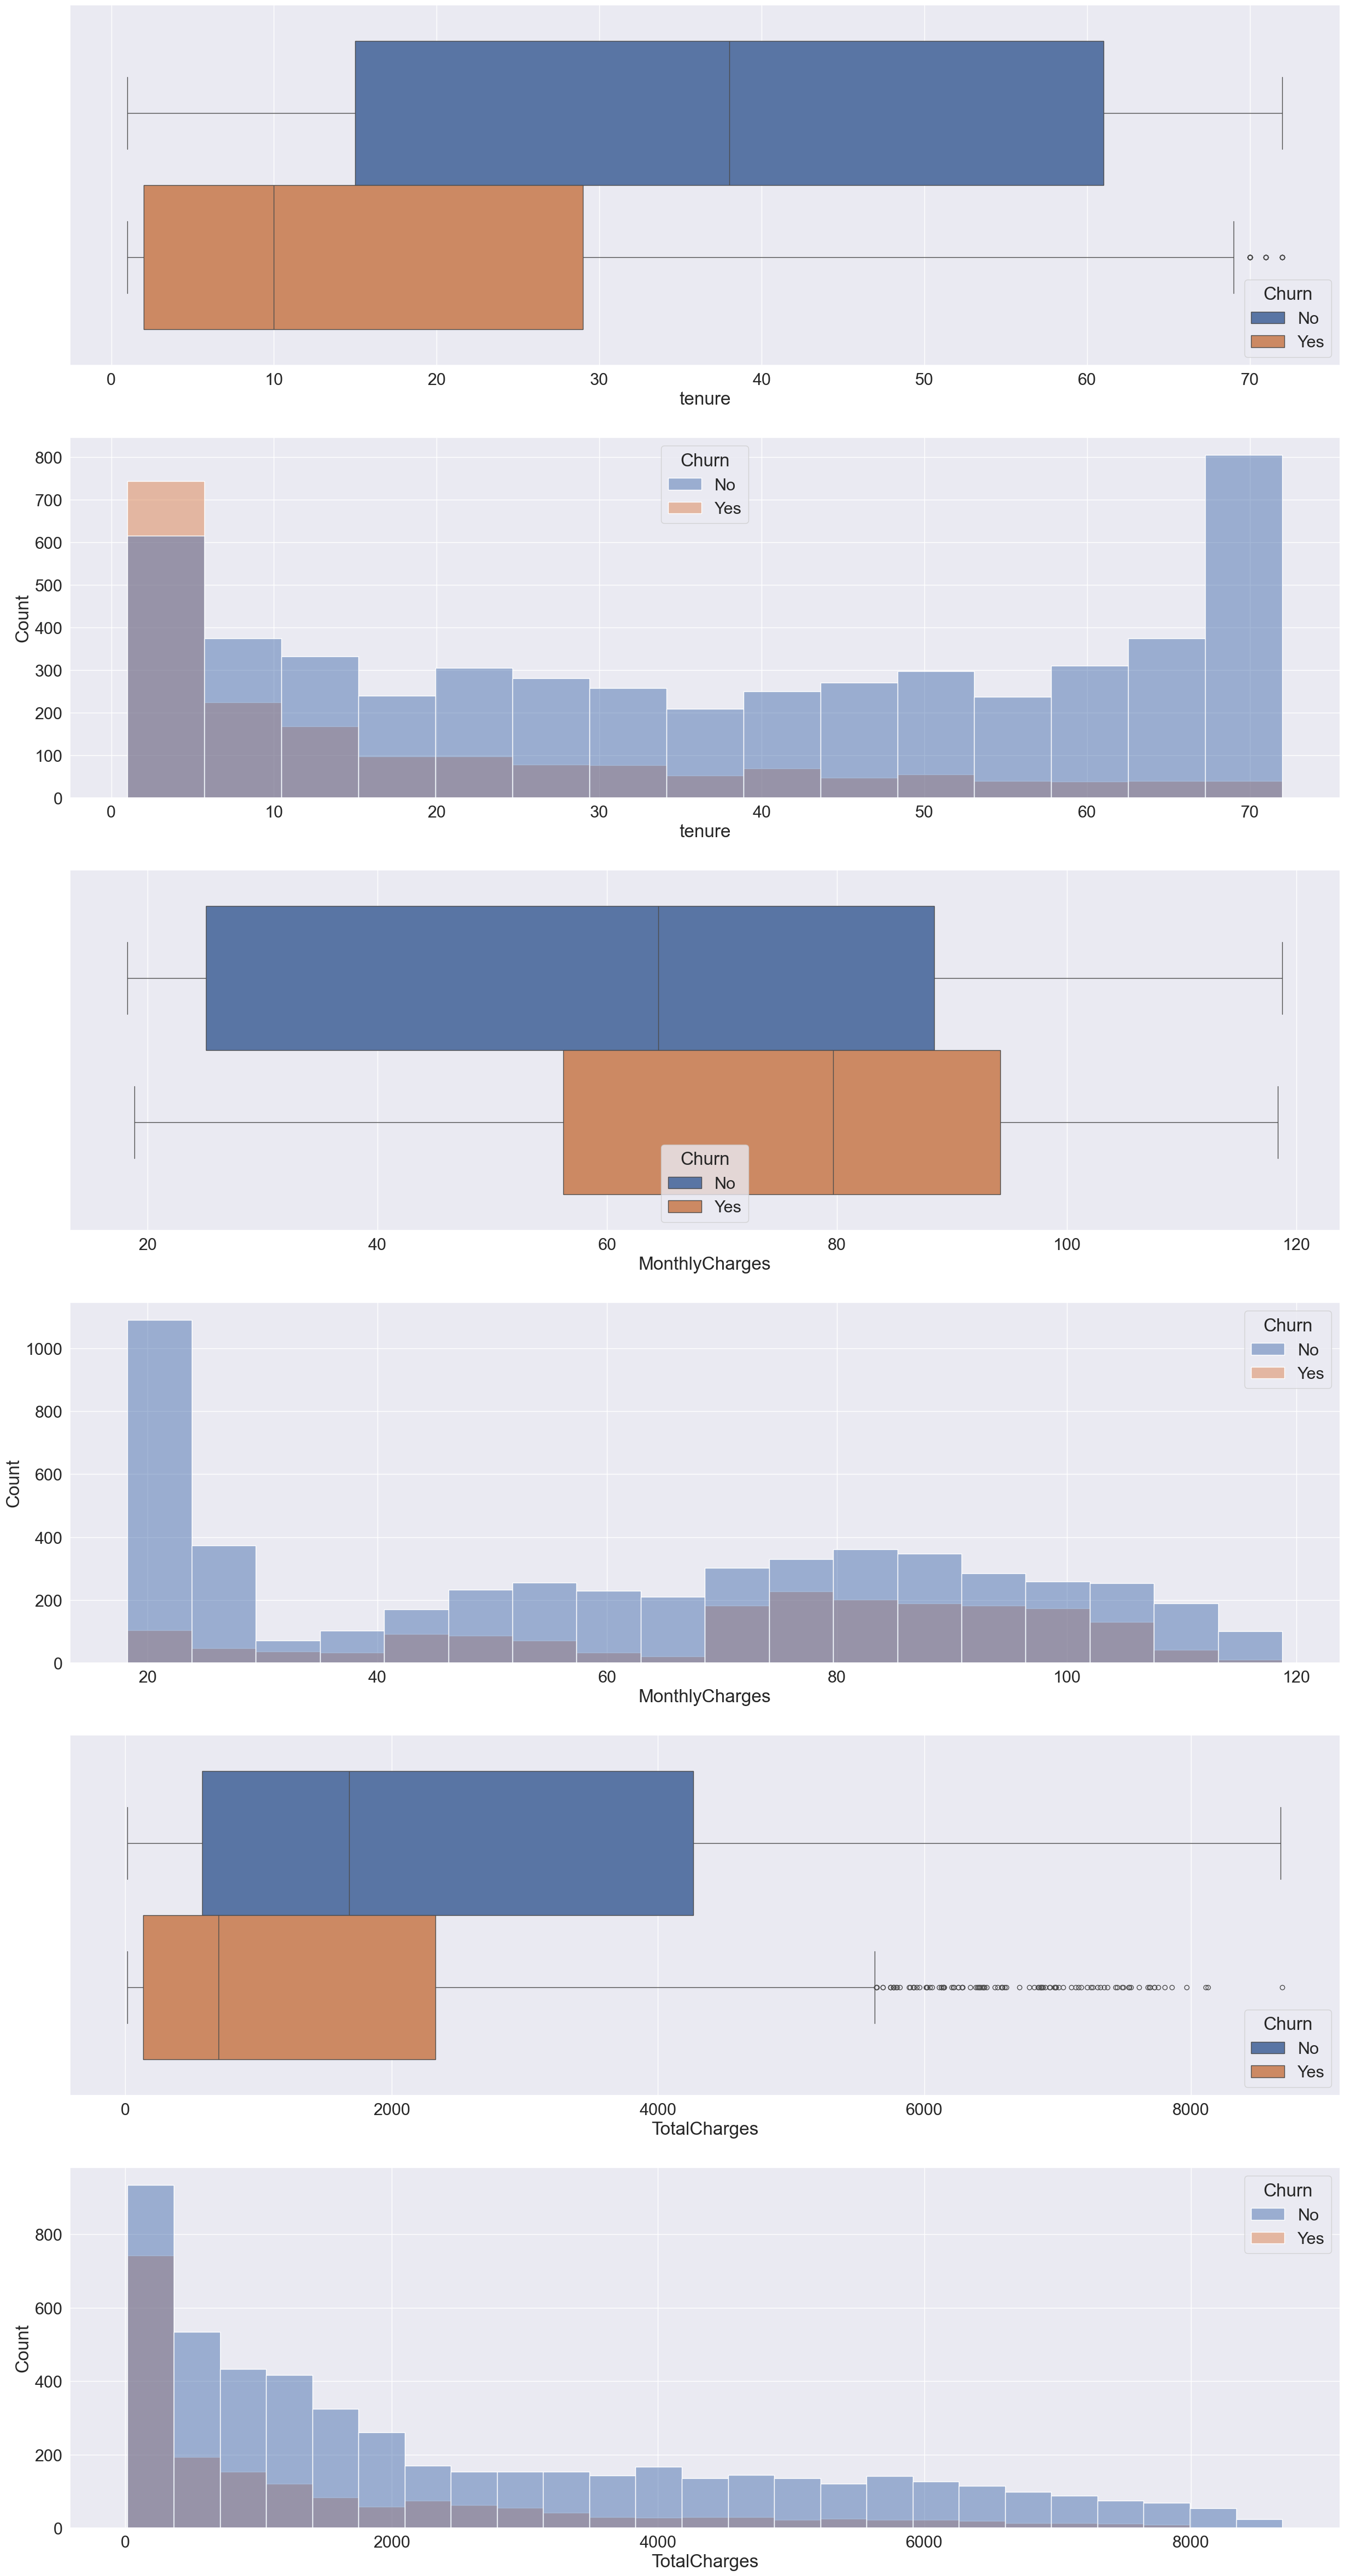

In [280]:
fig , ax = plt.subplots(6 , figsize = (30,60))
sns.set(font_scale = 2)

sns.boxplot(data = df , x = 'tenure' , ax=ax[0] , hue= 'Churn')
sns.histplot(data = df , x = 'tenure' , ax=ax[1] , hue="Churn")

sns.boxplot(data = df , x = 'MonthlyCharges' , ax=ax[2] , hue="Churn")
sns.histplot(data = df , x = 'MonthlyCharges' , ax=ax[3] , hue="Churn")

sns.boxplot(data = df , x = 'TotalCharges' , ax=ax[4] ,hue="Churn")
sns.histplot(data = df , x = 'TotalCharges' , ax=ax[5] ,hue="Churn" )

plt.show()

# Insight when its in  relation with Churn data

1.The customers who stays at the 10 month tenure    period are more likely to churn. In the otherhand the more the tenure period increases the customers churning rate has been reducing a lot

2.Here the churning rate has been increasing when the monthly charges ranges between 70 to 105 dollars approximately . There are very less churn rate when charges from 20 to 60 dollars

3.The churn rate for  Totalcharges also follows the sameges ter  Monthlycharges n as  when the pay was at least (below) 2000 dollars the churn rate was higher. similarly when the Totalcharges increasing the churn customers are  decreacing a lot and show a huge positive impact of customers being loyal at this point

### iii) Categorical Columns Analysis

In [283]:
Cat_col = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']


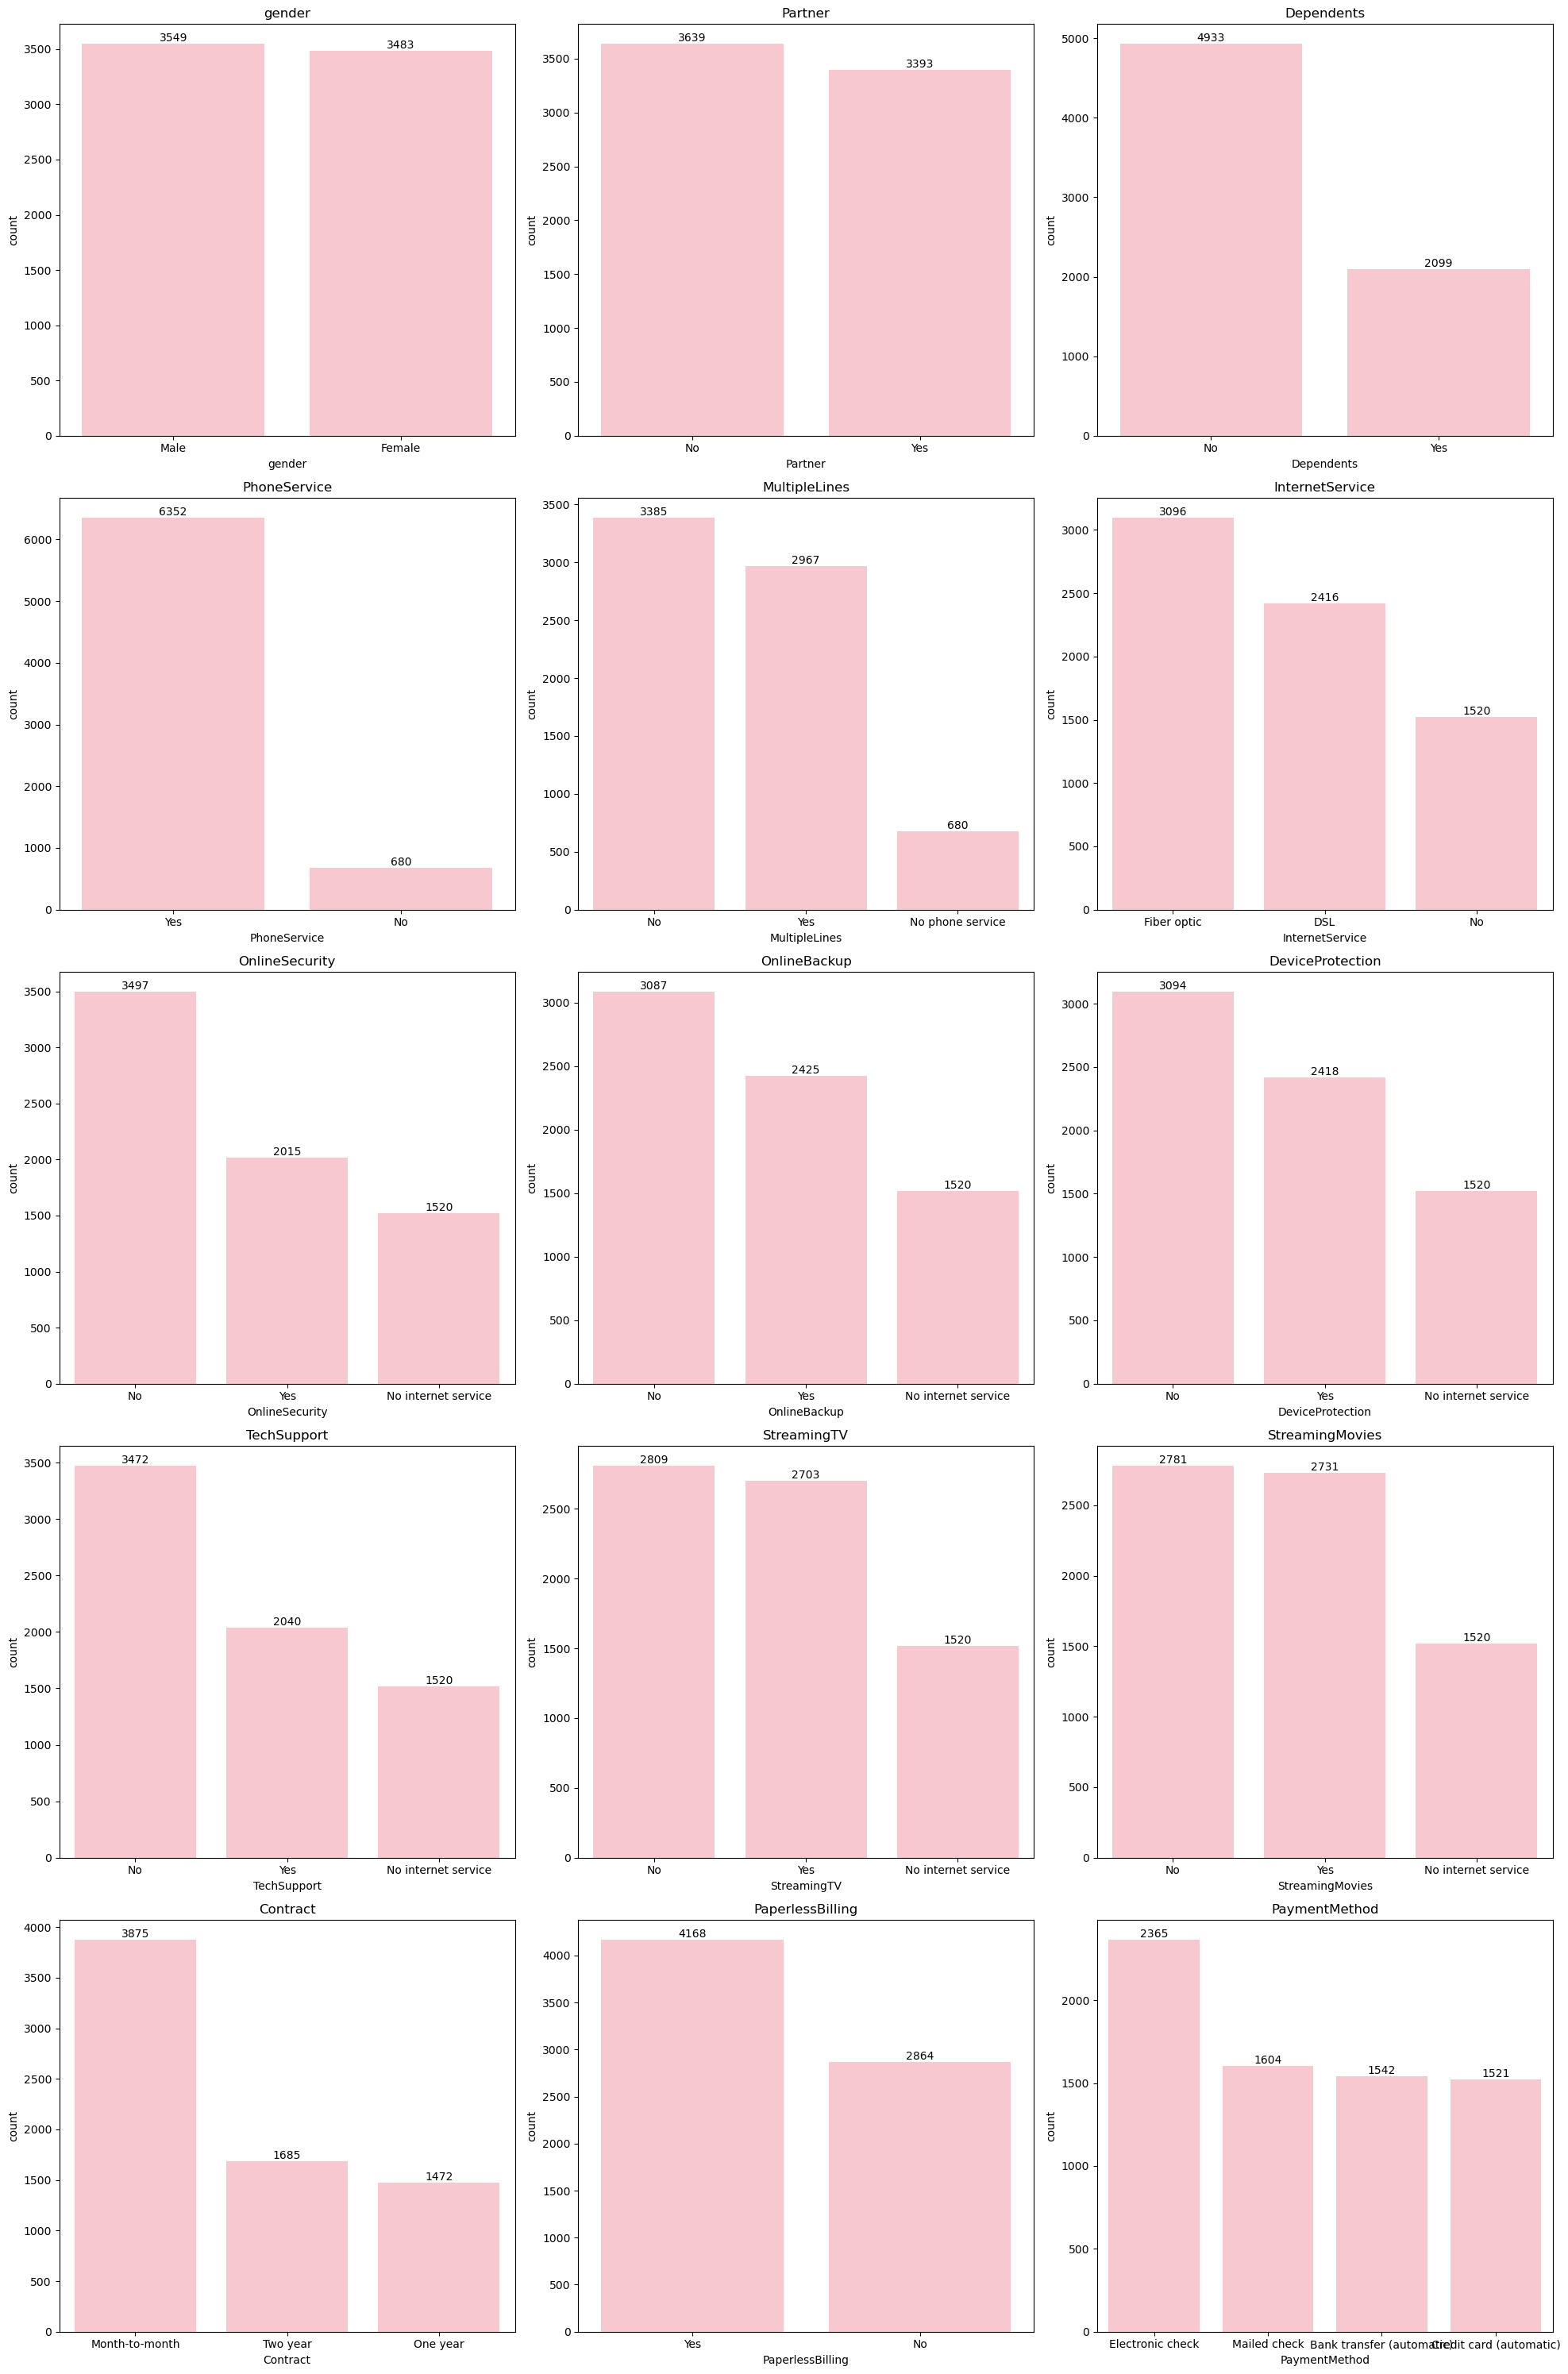

In [51]:
# Categorical Distribution


fig , axes = plt.subplots(nrows=5 , ncols=3 , figsize = (20,30))
axes = axes.flatten()

for i ,cols in  enumerate(Cat_col):
    ax = axes[i]
    grp = sns.countplot(data = df , x = df[cols] , ax=ax , order= df[cols].value_counts().index , color='pink')
    ax.bar_label(grp.containers[0])
    ax.set_title(cols)

plt.tight_layout()
plt.show()

1. In dependent feature , nearly 70% of the customers are not dependent

2. Majority of the customers are Using Phone Services(nearly  90%)

3. Nearly same distribution occurs at at Gender , Partner Column as Both Male and Female and with and without partner are similarly in a same scale 

4. Most of the customers are  not  using MultiplieLines(48%) and also 42% are Using it
   
5. Fiber Optic Internet service has been using  by most the customers(44%), 34% uses DSL 

6. Most of the customers are not using OnlineSecurity , OnlineBackup ,DeviceProtection , TechSupport , streamingTV  and in all these cases a few customers are not Using InternetService  

7. There are both using and non using customers are in StreamingMovies at a same level and a a few are not Using InternetService

8. Coming to the important point the majority if the customers are in a month to month Contract(55%) and and less on at yearly contracts

9. Most of the customers have done paperlessbilling method(60%) and prefer Electronic Check Payment method for Transacctions


### iv) Categorical Columns Analysis in relation with Target Column

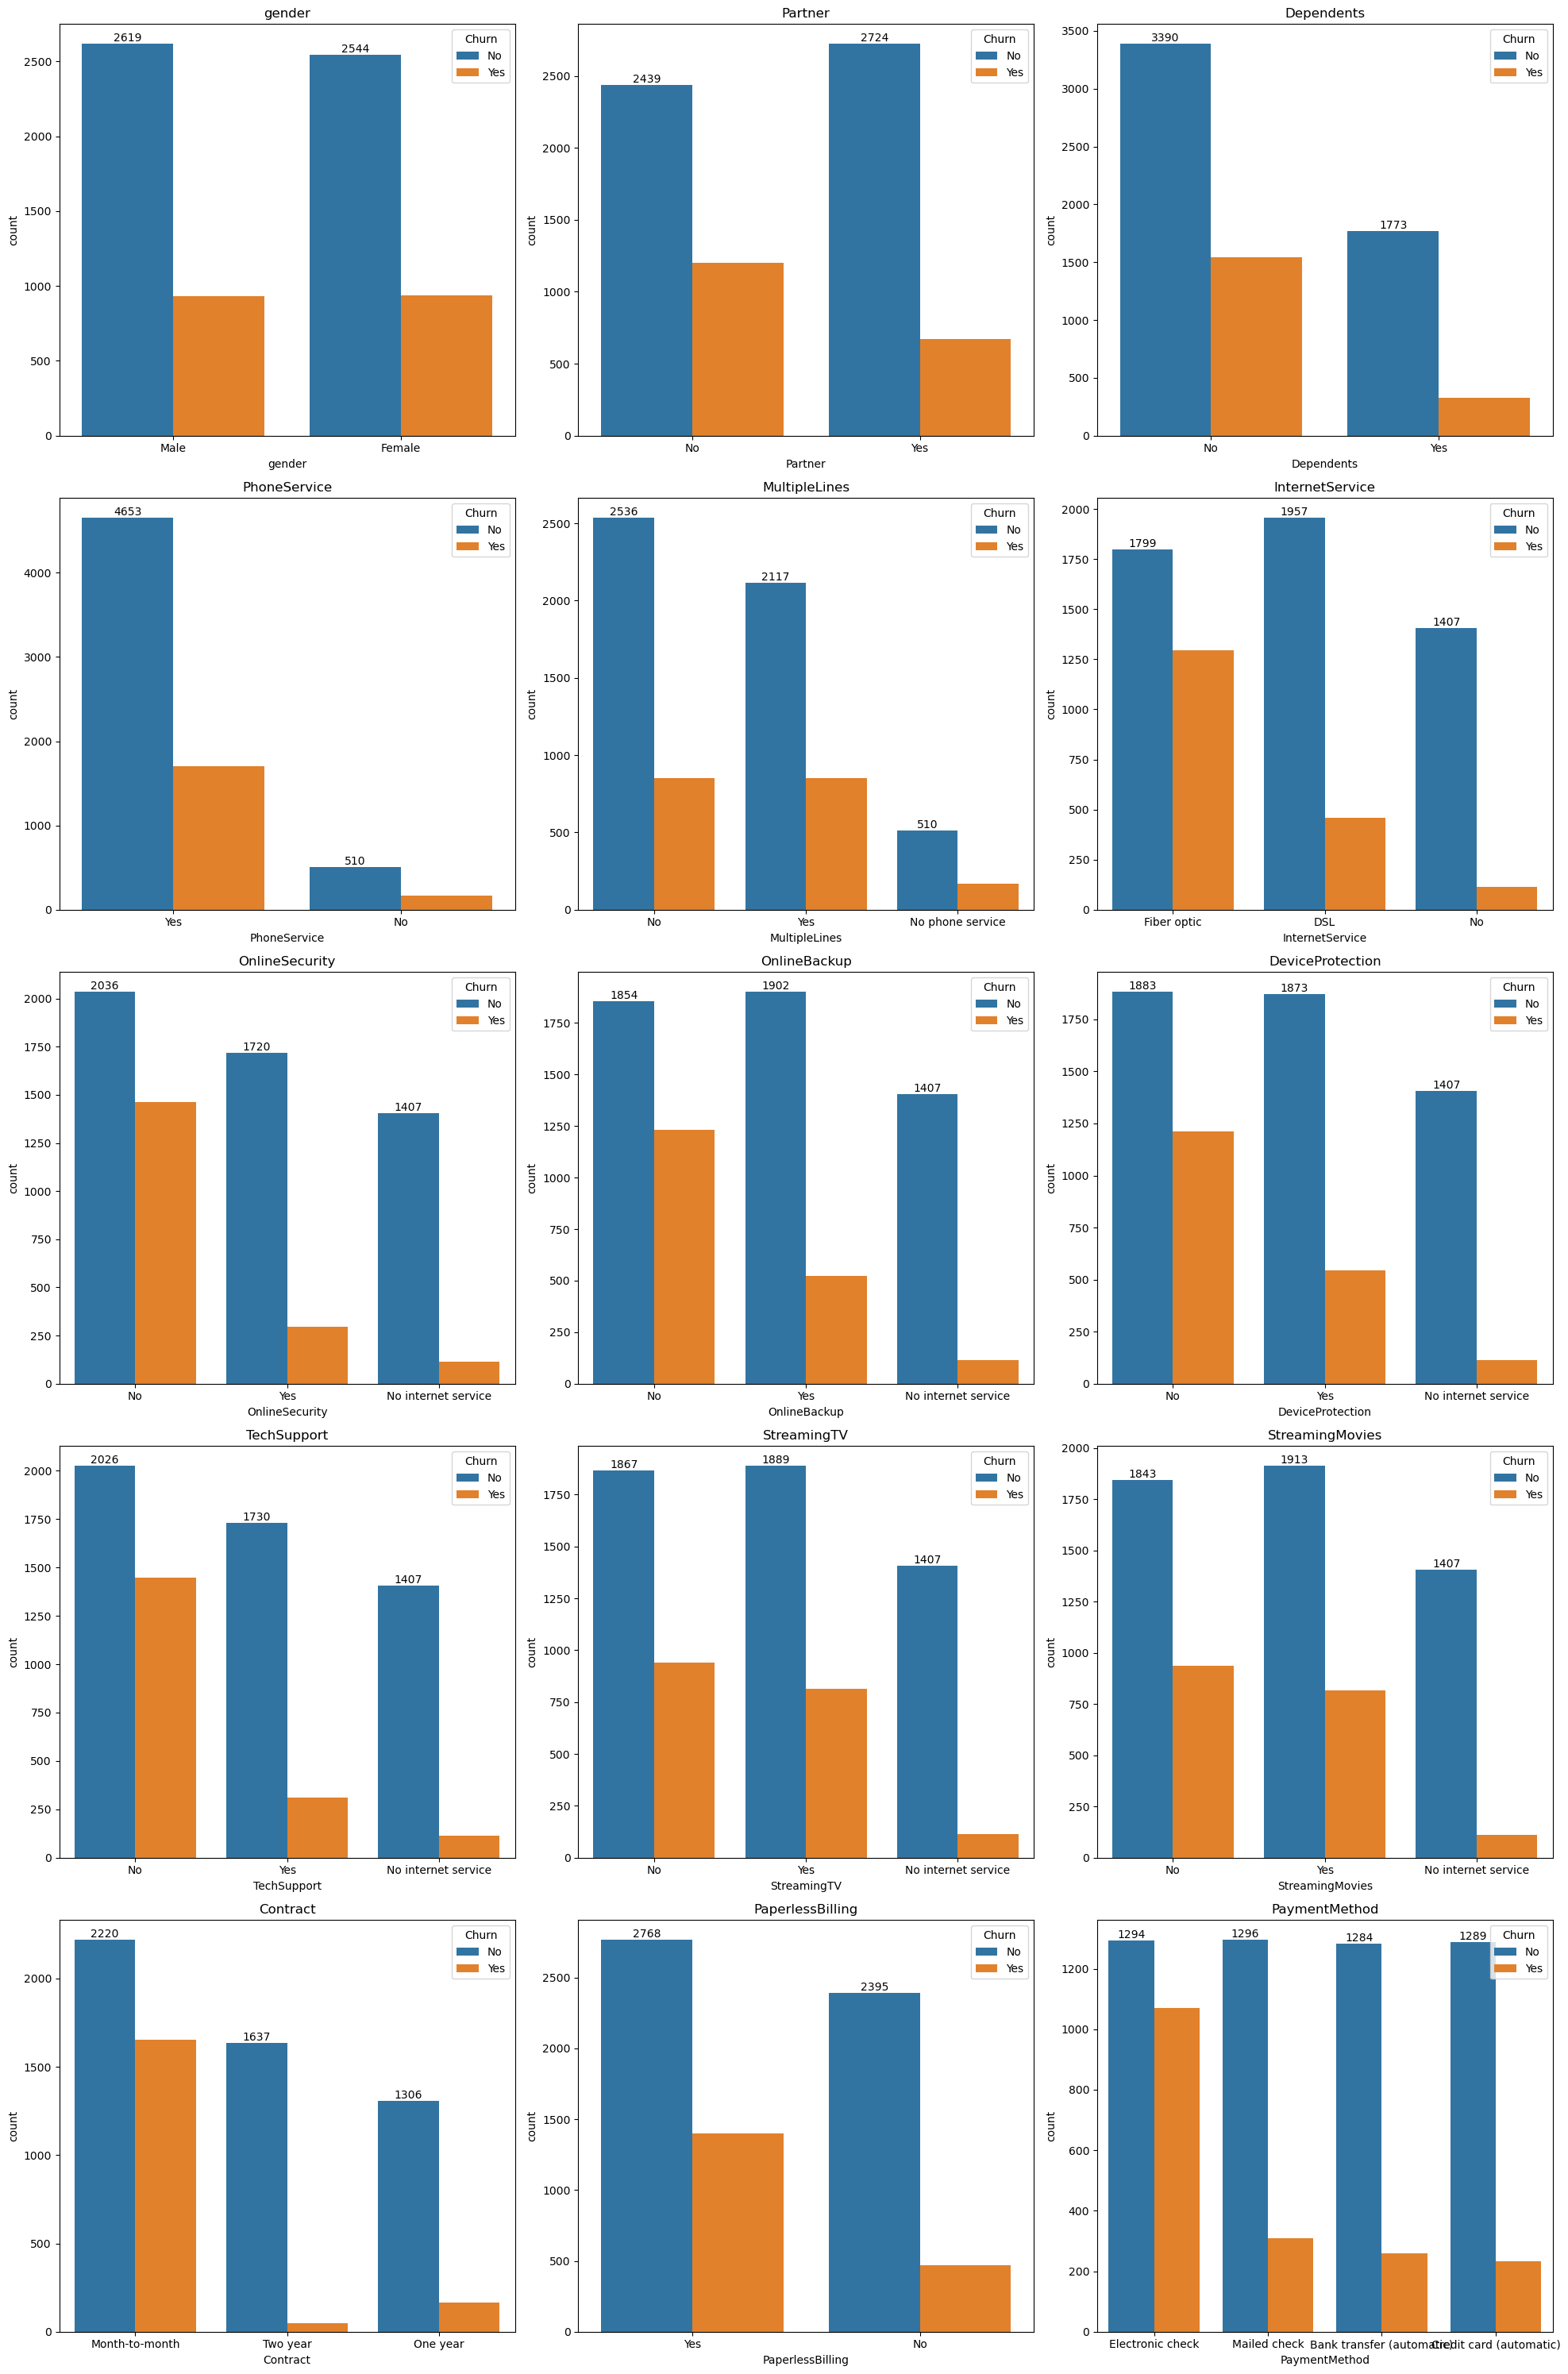

In [63]:
# Categorical Distribution with regard to Churn feature


fig , axes = plt.subplots(nrows=5 , ncols=3 , figsize = (20,30))
axes = axes.flatten()

for i ,cols in  enumerate(Cat_col):
    ax = axes[i]
    grp = sns.countplot(data = df , x = df[cols] , ax=ax , order= df[cols].value_counts().index   , hue=df['Churn'])
    ax.bar_label(grp.containers[0])
    ax.set_title(cols)

plt.tight_layout()
plt.show()